In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
!cp '/content/drive/MyDrive/Colab Notebooks/nlp_imdb_simple_rnn_and_bidir_lstm.ipynb' '/content/drive/MyDrive/Tutorial_Deep_Learning_YT/nlp_imdb_simple_rnn_and_bidir_lstm.ipynb'

In [30]:
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, SimpleRNN
from tensorflow.keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
max_words = 15000

In [17]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [20]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [32]:
regulizer = 0.01
model = Sequential([
    Input(shape=(max_words,)),
    Embedding(input_dim=max_words,
              output_dim=50
              ),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       AUC(name='AUC_ROC', curve='ROC'),
                       AUC(name='auc_pr', curve='PR')])

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - AUC_ROC: 0.6971 - accuracy: 0.6466 - auc_pr: 0.6839 - loss: 0.6557 - val_AUC_ROC: 0.8250 - val_accuracy: 0.7236 - val_auc_pr: 0.8085 - val_loss: 0.5609
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - AUC_ROC: 0.8450 - accuracy: 0.7474 - auc_pr: 0.8447 - loss: 0.5314 - val_AUC_ROC: 0.8698 - val_accuracy: 0.7964 - val_auc_pr: 0.8524 - val_loss: 0.4757
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC_ROC: 0.9165 - accuracy: 0.8364 - auc_pr: 0.9169 - loss: 0.4124 - val_AUC_ROC: 0.8788 - val_accuracy: 0.8068 - val_auc_pr: 0.8608 - val_loss: 0.4419
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - AUC_ROC: 0.8554 - accuracy: 0.7664 - auc_pr: 0.8553 - loss: 0.5002 - val_AUC_ROC: 0.8046 - val_accuracy: 0.7392 - val_auc_pr: 0.7809 - val_loss: 0.5426
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - AUC_ROC: 0.8849 - accuracy: 0.7886 - auc_pr: 0.8856 - loss: 0.4580 - val_AUC_ROC: 0.8532 - val_accuracy: 0.7972 - va

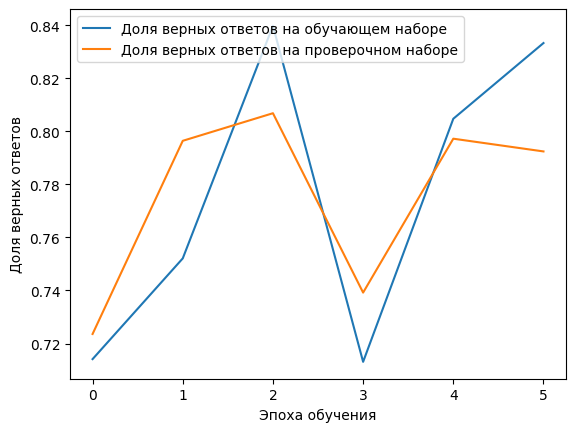

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [36]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - AUC_ROC: 0.8727 - accuracy: 0.8058 - auc_pr: 0.8594 - loss: 0.4505


In [42]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
model2 = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=max_words, output_dim=50),
    Bidirectional(LSTM(64)),  # Двунаправленный LSTM
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       AUC(name='AUC_ROC', curve='ROC'),
                       AUC(name='auc_pr', curve='PR')])


In [43]:
history2 = model2.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC_ROC: 0.7424 - accuracy: 0.6673 - auc_pr: 0.7479 - loss: 0.5734 - val_AUC_ROC: 0.9291 - val_accuracy: 0.8512 - val_auc_pr: 0.9242 - val_loss: 0.3539
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC_ROC: 0.9605 - accuracy: 0.8996 - auc_pr: 0.9596 - loss: 0.2544 - val_AUC_ROC: 0.9480 - val_accuracy: 0.8772 - val_auc_pr: 0.9479 - val_loss: 0.3081
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - AUC_ROC: 0.9830 - accuracy: 0.9411 - auc_pr: 0.9829 - loss: 0.1623 - val_AUC_ROC: 0.9424 - val_accuracy: 0.8472 - val_auc_pr: 0.9395 - val_loss: 0.3730
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC_ROC: 0.9891 - accuracy: 0.9580 - auc_pr: 0.9889 - loss: 0.1281 - val_AUC_ROC: 0.9314 - val_accuracy: 0.8472 - val_auc_pr: 0.9284 - val_loss: 0.3447
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - AUC_ROC: 0.9899 - accuracy: 0.9541 - auc_pr: 0.9899 - loss: 0.1263 - val_AUC_ROC: 0.9434 - val_accuracy: 0.8732 - va

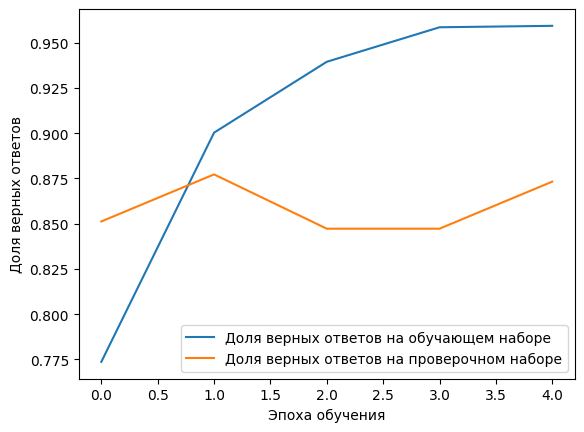

In [44]:
plt.plot(history2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [45]:
scores2 = model2.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC_ROC: 0.9413 - accuracy: 0.8614 - auc_pr: 0.9386 - loss: 0.3360
